# <center> Problem_1 </center>

**Dataset Description**: Wisconsin Diagnostic Breast Cancer(WDBC) dataset from the UCI repository.<br>
* Each row in the dataset represents a sample of biopsied tissue. The tissue for each sample is imaged and 10 characteristics of the nuclei of cells present in each image are characterized. <br>
* These characteristics are: *Radius, Texture, Perimeter, Area, Smoothness, Compactness, Concavity, Number of concave portions of contour, Symmetry, Fractal dimension.*<br> 
* Each sample used in the dataset is a feature vector of length 30. 
        * The first 10 entries in this feature vector are the mean of the characteristics listed above for each image.  
        * The second 10 are the standard deviation and 
        * last 10 are the largest value of each of these characteristics present in each image.

**Panda** has been imported for reading `csv` file and it reads data in Dataframe object.<br>
**numpy** has been imported for linear algebra calculations.

In [1]:
import pandas as pd
import numpy as np

Here **check_output** has been used to know about the files present in the `P1_data`.

In [2]:
from subprocess import check_output
print(check_output(['ls','/home/kk/Desktop/Assignment_2/P1_data/']).decode('utf8'))

testX.csv
testY.csv
trainX.csv
trainY.csv



**read_csv** is used to read `csv` file and **.head()** is used to display first 5 rows of the Dataframe.<br>
As we don't have column names, that's why `header=None` is used, otherwise first row will be interpreted as column names.

In [3]:
train = pd.read_csv('P1_data/trainX.csv',header = None)
train_label = pd.read_csv('P1_data/trainY.csv',header=None)
train.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,12.83,22.33,85.26,503.2,0.10880,0.17990,0.16950,0.06861,0.2123,0.07254,...,15.20,30.15,105.30,706.0,0.1777,0.5343,0.6282,0.1977,0.3407,0.12430
1,12.86,13.32,82.82,504.8,0.11340,0.08834,0.03800,0.03400,0.1543,0.06476,...,14.04,21.08,92.80,599.5,0.1547,0.2231,0.1791,0.1155,0.2382,0.08553
2,17.93,24.48,115.20,998.9,0.08855,0.07027,0.05699,0.04744,0.1538,0.05510,...,20.92,34.69,135.10,1320.0,0.1315,0.1806,0.2080,0.1136,0.2504,0.07948
3,19.16,26.60,126.20,1138.0,0.10200,0.14530,0.19210,0.09664,0.1902,0.06220,...,23.72,35.90,159.80,1724.0,0.1782,0.3841,0.5754,0.1872,0.3258,0.09720
4,13.66,15.15,88.27,580.6,0.08268,0.07548,0.04249,0.02471,0.1792,0.05897,...,14.54,19.64,97.96,657.0,0.1275,0.3104,0.2569,0.1054,0.3387,0.09638


**DecisionTreeClassifier** has been imported from **sklearn.tree** to learn *Decision Tree*.<br>
**accuracy_score** has been imported from **sklearn.metrics** to know *accuracy* after predicting on test data.

In [4]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
classifier = DecisionTreeClassifier(criterion='gini', max_depth=None, random_state=50)

First decision tree is learned using **.fit** function of **DecisionTreeClassifier** <br>
Here **decision_tree** stores the learned Decision Tree and using **export_graphviz** it's been exported to `dot` file.

In [5]:
from sklearn.tree import export_graphviz
decision_tree = classifier.fit(train,train_label)
export_graphviz(decision_tree,out_file='tree.dot') 
#pred_train = classifier.predict(train)

If getting error in next code install dependency by running following code in terminal `conda install -c conda-forge libiconv`

Here, `dot -Tpng tree.dot -o decision_tree.png` si used to convert **dot** file to `png` image format.<br>
**check_output** has been imported from subprocess which executes terminal command.<br>
After executing this command **decision_tree.png** image is created which is our learned decision tree.

In [6]:
print(check_output(['dot','-Tpng','tree.dot', '-o', 'decision_tree.png']).decode('utf8'))

### (a) Plot of decision tree model

**%matplotlib inline** is used to plot the tree on the notebook itself.<br>
`pyplot` from `matplotlib` has been imported to plot graph.<br>
**mpimg** has been imported to read image.<br>
`plt.rcParams` is used to set figure size.

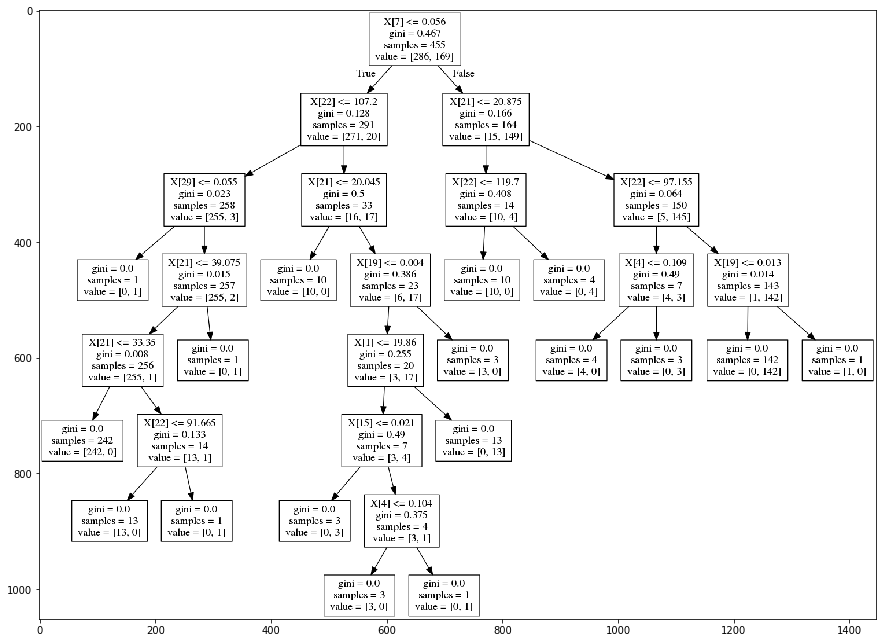

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
plt.rcParams["figure.figsize"] = (15,15)
img=mpimg.imread('decision_tree.png')
plt.imshow(img)

### (b) Total number of Nodes in the tree
So, the **total number of nodes** we have is **33**

**node_count** is used to count the total number of nodes in the tree

In [8]:
decision_tree.tree_.node_count

33

### (c) Total number of leaf nodes in the tree
As we can see **total number of leaf node** is **17**.

In [9]:
total_nodes=decision_tree.tree_.node_count
left_children = decision_tree.tree_.children_left
right_children = decision_tree.tree_.children_right

features_as_leaves = np.zeros(shape=total_nodes, dtype=bool)

stack = [(0, -1)]  # seed is the root node id and its parent depth
no_of_leaves=0
while len(stack) > 0:
    node_id, parent_depth = stack.pop()

    # If we have a test node
    if (left_children[node_id] != right_children[node_id]):
        stack.append((left_children[node_id], parent_depth + 1))
        stack.append((right_children[node_id], parent_depth + 1))
    else:
        features_as_leaves[node_id] = True
        no_of_leaves = no_of_leaves + 1
print("Total no of leaf nodes are : {}".format(no_of_leaves))

Total no of leaf nodes are : 17


test data and its label are read in `test` and `test_label`.

In [10]:
test = pd.read_csv('P1_data/testX.csv',header = None)
test_label = pd.read_csv('P1_data/testY.csv',header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
0,13.38,30.72,86.34,557.2,0.09245,0.07426,0.02819,0.03264,0.1375,0.06016,...,15.05,41.61,96.69,705.6,0.1172,0.14210,0.07003,0.07763,0.2196,0.07675
1,12.18,20.52,77.22,458.7,0.08013,0.04038,0.02383,0.01770,0.1739,0.05677,...,13.34,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878
2,14.80,17.66,95.88,674.8,0.09179,0.08890,0.04069,0.02260,0.1893,0.05886,...,16.43,22.74,105.90,829.5,0.1226,0.18810,0.20600,0.08308,0.3600,0.07285
3,14.64,15.24,95.77,651.9,0.11320,0.13390,0.09966,0.07064,0.2116,0.06346,...,16.34,18.24,109.40,803.6,0.1277,0.30890,0.26040,0.13970,0.3151,0.08473
4,14.60,23.29,93.97,664.7,0.08682,0.06636,0.08390,0.05271,0.1627,0.05416,...,15.79,31.71,102.20,758.2,0.1312,0.15810,0.26750,0.13590,0.2477,0.06836


**acuracy_test** is a function to determine the accuracy taking n as the input which is the number of training examples corresponding to 10-100%.<br>
In `pandas` **iloc** or **loc** is used to access rows and columns.

In [11]:
def accuracy_test(n):
    classifier.fit(train.iloc[0:n],train_label[0:n])
    test_pred = classifier.predict(test)
    accuracy=accuracy_score(test_label,test_pred)*100
    return accuracy

**(Q)** (ii) Train your binary decision tree with increasing sizes of training set, say 10%, 20%, ..., 100%.
and test the trees with the test set. Make a plot to show how training and test accuracies vary with
number of training samples.

### Accuaracy on test_data considering 10-100% of train data.

In [12]:
for i in range(1,11,1):
    print('Considerin train_set of {}%, Accuracy is {}'.format(i*10,format(accuracy_test(int(len(train)*i/10)))))

Considerin train_set of 10%, Accuracy is 82.45614035087719
Considerin train_set of 20%, Accuracy is 80.7017543859649
Considerin train_set of 30%, Accuracy is 89.47368421052632
Considerin train_set of 40%, Accuracy is 87.71929824561403
Considerin train_set of 50%, Accuracy is 89.47368421052632
Considerin train_set of 60%, Accuracy is 85.96491228070175
Considerin train_set of 70%, Accuracy is 87.71929824561403
Considerin train_set of 80%, Accuracy is 89.47368421052632
Considerin train_set of 90%, Accuracy is 82.45614035087719
Considerin train_set of 100%, Accuracy is 85.96491228070175


**Accuracy on traing over all training data.**

In [13]:
pred_label = classifier.predict(test)
accuracy_score(test_label,pred_label)*100

85.964912280701753

**test_accuracy** and **percentage_of_train** are lists which stores accuracies corresponding to respective train percentage of train data.

In [14]:
test_accuracy = []
percentage_of_train = []
for i in range(10,110,10):
    accu = accuracy_test(int(len(train)*i/100))
    test_accuracy.append(accu)
    percentage_of_train.append(i)

In [15]:
test_accuracy

[82.456140350877192,
 80.701754385964904,
 89.473684210526315,
 87.719298245614027,
 89.473684210526315,
 85.964912280701753,
 87.719298245614027,
 89.473684210526315,
 82.456140350877192,
 85.964912280701753]

**Plot to show how training and test accuracies vary with number of training samples.** 

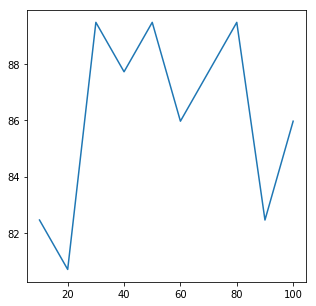

In [16]:
plt.rcParams["figure.figsize"] = (5,5)
plt.plot(percentage_of_train,test_accuracy)

**Confusion Matrix**

In [17]:
from sklearn.metrics import confusion_matrix
confusion_matrix(test_label,pred_label)

array([[28,  4],
       [ 4, 21]])

**Misclassification rate of 1st class.**

In [18]:
4/(28+4)

0.125

**Misclassification rate of 2nd class.**

In [19]:
4/(21+4)

0.16